## CSC 578 HW\#7 Intel Image Classification Competition

## Name: Hithesh Shanmugam 


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

### Load the training data. Split into training 80% and validation 20%.

In [4]:
train_directory = '../input/csc-578-hw7-fall-2022/train'
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',        # use names of subdirectories as target labels
    label_mode='categorical', # convert target class (int) to one-hot-vector
    validation_split=0.2,
    subset="training",
    seed=123,                 # use same random seed with valid_set
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(150, 150),
)

valid_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset="validation",
    seed=123,
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(150, 150),
)

Found 13986 files belonging to 6 classes.
Using 11189 files for training.


2022-11-14 03:43:09.726903: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 03:43:09.824082: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 03:43:09.824871: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 03:43:09.827222: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 13986 files belonging to 6 classes.
Using 2797 files for validation.


2022-11-14 03:43:23.604047: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


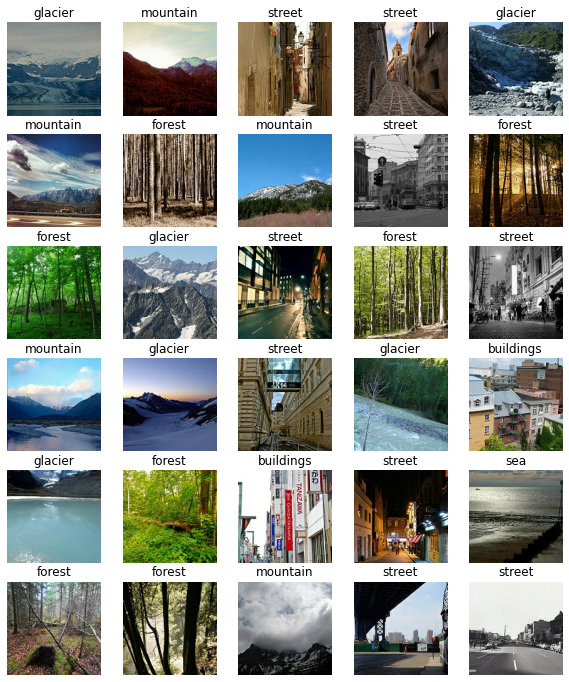

In [5]:
# Visualize some training examples.
plt.figure(figsize=(10, 12))
class_names = train_dataset.class_names
for images, labels in train_dataset.take(1):
    for i in range(30):
        ax = plt.subplot(6, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

### Define a model.

In [5]:
# A relatively simply CNN model
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(3,3))
model.add(keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [6]:
# Print model summary to ensure
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [7]:
# Fit the model.  We train for 15 epochs for now.
history = model.fit(train_dataset, epochs=15, validation_data=valid_dataset)

Epoch 1/15


2022-11-13 21:16:11.318495: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


350/350 [==============================] - 34s 76ms/step - loss: 1.6441 - accuracy: 0.4122 - val_loss: 1.2540 - val_accuracy: 0.5191
Epoch 2/15
350/350 [==============================] - 11s 32ms/step - loss: 1.1415 - accuracy: 0.5400 - val_loss: 1.0381 - val_accuracy: 0.5860
Epoch 3/15
350/350 [==============================] - 12s 33ms/step - loss: 0.9685 - accuracy: 0.6302 - val_loss: 0.9039 - val_accuracy: 0.6654
Epoch 4/15
350/350 [==============================] - 11s 31ms/step - loss: 0.8540 - accuracy: 0.6831 - val_loss: 0.8948 - val_accuracy: 0.6625
Epoch 5/15
350/350 [==============================] - 11s 31ms/step - loss: 0.7887 - accuracy: 0.7125 - val_loss: 0.7110 - val_accuracy: 0.7469
Epoch 6/15
350/350 [==============================] - 11s 32ms/step - loss: 0.7073 - accuracy: 0.7418 - val_loss: 0.7093 - val_accuracy: 0.7369
Epoch 7/15
350/350 [==============================] - 11s 32ms/step - loss: 0.6604 - accuracy: 0.7607 - val_loss: 0.7604 - val_accuracy: 0.7458
Epo

### Visualize Training (accuracy and loss)

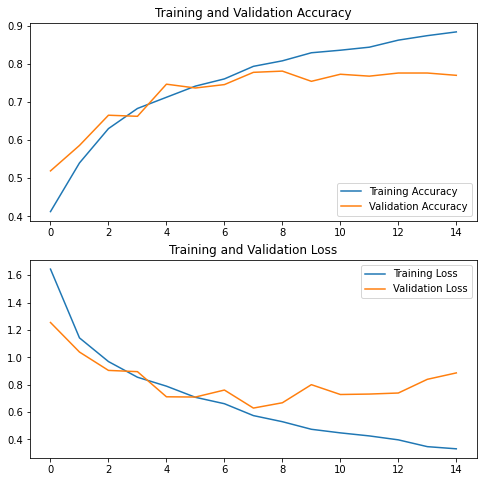

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Adding layer Model**

Adding an extra layer to the CNN to understand the concept of adding a layer to the convolution neural network

In [9]:
# A CNN model with an additional layer in the network
model1 = keras.Sequential()
model1.add(keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape=(150,150,3)))
model1.add(keras.layers.MaxPooling2D(2,2))
model1.add(keras.layers.Conv2D(64, (3,3), activation = 'relu'))# additional layer in the network
model1.add(keras.layers.MaxPooling2D(2,2))
model1.add(keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model1.add(keras.layers.MaxPooling2D(3,3))
model1.add(keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model1.add(keras.layers.MaxPooling2D(3,3))

model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(128, activation='relu'))
model1.add(Dropout(0.25))
model1.add(keras.layers.Dense(64, activation='relu'))
model1.add(Dropout(0.25))
model1.add(keras.layers.Dense(6, activation='softmax'))

# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model1.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

**Summarising the model**

In [10]:
model1.summary()#summarizing the model 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 32)         

**Model fitting**

In [11]:
history1 = model1.fit(train_dataset, epochs=15, validation_data=valid_dataset)# fitting the model with 15 epochs

Epoch 1/15
350/350 [==============================] - 13s 35ms/step - loss: 1.7666 - accuracy: 0.3801 - val_loss: 1.1881 - val_accuracy: 0.5284
Epoch 2/15
350/350 [==============================] - 11s 32ms/step - loss: 1.0666 - accuracy: 0.5832 - val_loss: 1.0149 - val_accuracy: 0.5928
Epoch 3/15
350/350 [==============================] - 12s 34ms/step - loss: 0.9432 - accuracy: 0.6344 - val_loss: 0.8299 - val_accuracy: 0.6950
Epoch 4/15
350/350 [==============================] - 12s 34ms/step - loss: 0.8441 - accuracy: 0.6820 - val_loss: 0.7954 - val_accuracy: 0.7008
Epoch 5/15
350/350 [==============================] - 12s 34ms/step - loss: 0.7630 - accuracy: 0.7239 - val_loss: 0.7148 - val_accuracy: 0.7383
Epoch 6/15
350/350 [==============================] - 12s 33ms/step - loss: 0.6873 - accuracy: 0.7489 - val_loss: 0.6341 - val_accuracy: 0.7783
Epoch 7/15
350/350 [==============================] - 12s 33ms/step - loss: 0.6643 - accuracy: 0.7564 - val_loss: 0.6549 - val_accuracy:

**Visualsing**

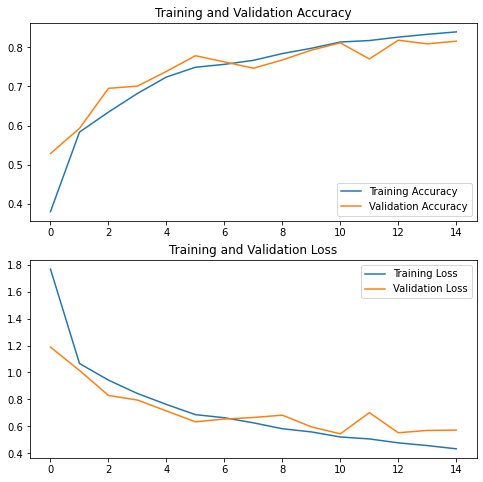

In [12]:
# visulaization of the accuracy and the loss of the additional layer model
acc = history1.history['accuracy']# importing accuracy from the fitted model
val_acc = history1.history['val_accuracy']# importing validation accuracy from the fitted model

loss = history1.history['loss']# importing loss from the fitted model
val_loss = history1.history['val_loss']# importing validation loss from the fitted model

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Removing layers**

By adding an extra layer there was a improvement a little bit than the original model. So trying to remove layers in the model and add padding

In [13]:
# A CNN model with removing some of the layers 
model2 = keras.Sequential()

model2.add(keras.layers.Conv2D(64, (3,3), padding='same', activation = 'relu', input_shape=(150,150,3)))# addition of padding
model2.add(keras.layers.MaxPooling2D(2,2))
# removed layer
model2.add(keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu'))# addition of padding
model2.add(keras.layers.MaxPooling2D(3,3))

model2.add(keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu'))# addition of padding
model2.add(keras.layers.Flatten())

model2.add(keras.layers.Dense(128, activation='relu'))
# removed dropouts and a dense layer
model2.add(keras.layers.Dense(6, activation='softmax'))
# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model2.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

**Summarising the model**

In [14]:
model2.summary()# summarizing the model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 25, 25, 32)        9248      
_________________________________________________________________
flatten_2 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

**Model fitting**

In [15]:
history2 = model2.fit(train_dataset, epochs=15, validation_data=valid_dataset)# fitting the model and runnning with 15 epochs

Epoch 1/15
350/350 [==============================] - 12s 32ms/step - loss: 2.6402 - accuracy: 0.5213 - val_loss: 1.0213 - val_accuracy: 0.5892
Epoch 2/15
350/350 [==============================] - 11s 31ms/step - loss: 0.9118 - accuracy: 0.6520 - val_loss: 0.9539 - val_accuracy: 0.6332
Epoch 3/15
350/350 [==============================] - 12s 33ms/step - loss: 0.7469 - accuracy: 0.7171 - val_loss: 0.8564 - val_accuracy: 0.6925
Epoch 4/15
350/350 [==============================] - 11s 31ms/step - loss: 0.6110 - accuracy: 0.7753 - val_loss: 0.9437 - val_accuracy: 0.6825
Epoch 5/15
350/350 [==============================] - 11s 31ms/step - loss: 0.4717 - accuracy: 0.8293 - val_loss: 1.0735 - val_accuracy: 0.6843
Epoch 6/15
350/350 [==============================] - 11s 31ms/step - loss: 0.3997 - accuracy: 0.8536 - val_loss: 1.2917 - val_accuracy: 0.6718
Epoch 7/15
350/350 [==============================] - 12s 33ms/step - loss: 0.3267 - accuracy: 0.8832 - val_loss: 1.3012 - val_accuracy:

**Visualsing**

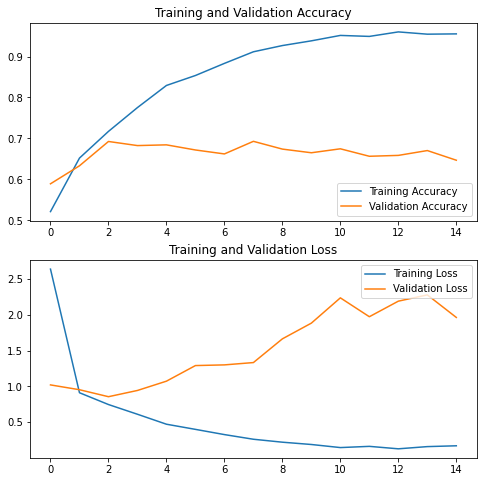

In [16]:
#visualization of the loss and accuracy of the removed layers model
acc = history2.history['accuracy']# importing accuracy from the fitted model
val_acc = history2.history['val_accuracy']# importing validation accuracy from the fitted model

loss = history2.history['loss']# importing loss from the fitted model
val_loss = history2.history['val_loss']# importing validation loss from the fitted model

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Random selection of layers and padding**

Using strides in the Maxpooling layer



In [17]:
# A CNN model with random selection of layers and also using strides in the pooling layer
model3 = keras.Sequential()

model3.add(keras.layers.Conv2D(64, (3,3), padding ='same', activation = 'relu', input_shape=(150,150,3)))# addition of padding
model3.add(keras.layers.Conv2D(32, (3,3) ,padding ='same', activation = 'relu'))# addition of padding
model3.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))# adding strides

model3.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model3.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model3.add(keras.layers.MaxPooling2D((3,3),strides=(3,3)))# adding strides

model3.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model3.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model3.add(keras.layers.Flatten())

model3.add(keras.layers.Dense(128, activation='relu'))
#removed the dropouts and dense layer
model3.add(keras.layers.Dense(6, activation='softmax'))


# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model3.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

**Summarising the model**

In [44]:
model3.summary()# summarizing the model

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 150, 150, 32)      18464     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 25, 25, 32)       

**Model fitting**

In [18]:
history3 = model3.fit(train_dataset, epochs=15, validation_data=valid_dataset)# fitting the model and running with 15 epochs

Epoch 1/15
350/350 [==============================] - 14s 38ms/step - loss: 2.0933 - accuracy: 0.5434 - val_loss: 0.8319 - val_accuracy: 0.6747
Epoch 2/15
350/350 [==============================] - 13s 36ms/step - loss: 0.7779 - accuracy: 0.7054 - val_loss: 0.7328 - val_accuracy: 0.7243
Epoch 3/15
350/350 [==============================] - 13s 37ms/step - loss: 0.5905 - accuracy: 0.7806 - val_loss: 0.9475 - val_accuracy: 0.7086
Epoch 4/15
350/350 [==============================] - 13s 36ms/step - loss: 0.4151 - accuracy: 0.8482 - val_loss: 1.0232 - val_accuracy: 0.7290
Epoch 5/15
350/350 [==============================] - 13s 36ms/step - loss: 0.3279 - accuracy: 0.8813 - val_loss: 1.0837 - val_accuracy: 0.7065
Epoch 6/15
350/350 [==============================] - 13s 36ms/step - loss: 0.2741 - accuracy: 0.9010 - val_loss: 1.1479 - val_accuracy: 0.7322
Epoch 7/15
350/350 [==============================] - 13s 35ms/step - loss: 0.2012 - accuracy: 0.9312 - val_loss: 1.5870 - val_accuracy:

**Visualising**

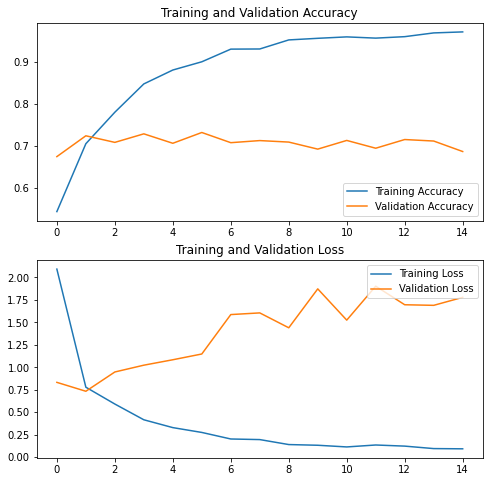

In [19]:
#visualisation of loss and accuracy in the random selection of layers model
acc = history3.history['accuracy']# importing accuracy from the fitted model
val_acc = history3.history['val_accuracy']# importing validation accuracy from the fitted model

loss = history3.history['loss']# importing loss from the fitted model
val_loss = history3.history['val_loss']# importing validation loss from the fitted model

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Adjusting the layers**

By adjusting some of the layers and experimenting with the spatial dropout and strides gave the best model in all the models I have created

In [20]:
# A CNN model with some experimentation of strides and spatial dropout
model4 = keras.Sequential()

model4.add(keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(150,150,3)))# addition of padding
model4.add(keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'))# addition of padding
model4.add(keras.layers.SpatialDropout2D(0.25))
model4.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))# adding strides

model4.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model4.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model4.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model4.add(keras.layers.SpatialDropout2D(0.25))
model4.add(keras.layers.MaxPooling2D((3,3),strides=(3,3)))# adding strides

model4.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model4.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model4.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model4.add(keras.layers.MaxPooling2D((3,3),strides=(3,3)))# adding strides
model4.add(keras.layers.Flatten())

model4.add(keras.layers.Dense(128, activation='relu'))
#removed dropout and dense layers
model4.add(keras.layers.Dense(6,activation='softmax'))


# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model4.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

**Summarising the model**

In [45]:
model4.summary()# summarizing the model

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 150, 150, 32)      18464     
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 75, 75, 32)       

**Model fitting**

In [21]:
history4 = model4.fit(train_dataset, epochs=15, validation_data=valid_dataset)# fitting the model and running them with 15 epochs

Epoch 1/15
350/350 [==============================] - 17s 45ms/step - loss: 1.1874 - accuracy: 0.5280 - val_loss: 0.9012 - val_accuracy: 0.6350
Epoch 2/15
350/350 [==============================] - 16s 44ms/step - loss: 0.8509 - accuracy: 0.6683 - val_loss: 0.7563 - val_accuracy: 0.7193
Epoch 3/15
350/350 [==============================] - 16s 44ms/step - loss: 0.7403 - accuracy: 0.7200 - val_loss: 0.6792 - val_accuracy: 0.7365
Epoch 4/15
350/350 [==============================] - 16s 44ms/step - loss: 0.6608 - accuracy: 0.7521 - val_loss: 0.6706 - val_accuracy: 0.7497
Epoch 5/15
350/350 [==============================] - 16s 45ms/step - loss: 0.5951 - accuracy: 0.7749 - val_loss: 0.6266 - val_accuracy: 0.7590
Epoch 6/15
350/350 [==============================] - 15s 42ms/step - loss: 0.5474 - accuracy: 0.7977 - val_loss: 0.6370 - val_accuracy: 0.7633
Epoch 7/15
350/350 [==============================] - 15s 41ms/step - loss: 0.5063 - accuracy: 0.8123 - val_loss: 0.6575 - val_accuracy:

**Visualising**

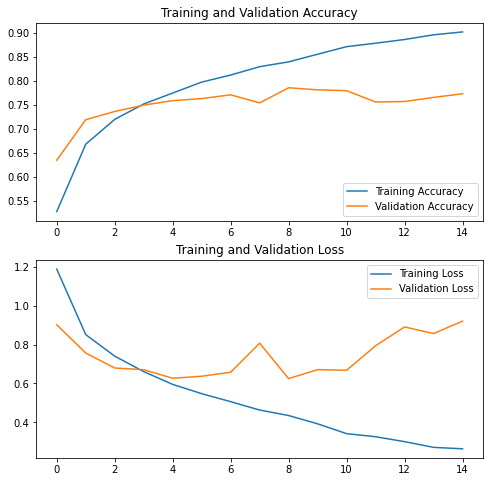

In [22]:
#visualising the loss and accuracy in the experimentation of Strides and Spatial Dropout model
acc = history4.history['accuracy']# importing accuracy from the fitted model
val_acc = history4.history['val_accuracy']# importing validation accuracy from the fitted model

loss = history4.history['loss']# importing loss from the fitted model
val_loss = history4.history['val_loss']# importing validation loss from the fitted model

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Adding extra layers in the previous model**

Since last model was good I tried to add some extra layers in this model but it was not a better model than the previous model.

In [23]:
# A CNN model with additional layers in the previous model
model5 = keras.Sequential()

model5.add(keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(150,150,3)))# addition of padding
model5.add(keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'))# addition of padding
model5.add(keras.layers.SpatialDropout2D(0.25))
model5.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))# adding strides

model5.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model5.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model5.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model5.add(keras.layers.SpatialDropout2D(0.25))
model5.add(keras.layers.MaxPooling2D((3,3),strides=(3,3)))# adding strides

model5.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model5.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model5.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model5.add(keras.layers.SpatialDropout2D(0.25))
model5.add(keras.layers.MaxPooling2D((3,3),strides=(3,3)))# adding strides

model5.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding # additional layer
model5.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding # additional layer
model5.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding # additional layer
model5.add(keras.layers.SpatialDropout2D(0.25)) # additional spatial dropout
model5.add(keras.layers.MaxPooling2D((3,3),strides=(3,3)))# adding strides # additional pooling layer

model5.add(keras.layers.Flatten())
model5.add(keras.layers.Dense(128, activation='relu'))
#removed dropout and dense layers
model5.add(keras.layers.Dense(6,activation='softmax'))


# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model5.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

**Summarising the model**

In [47]:
model5.summary()# summarizing the model

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 150, 150, 32)      18464     
_________________________________________________________________
spatial_dropout2d_2 (Spatial (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 75, 75, 32)       

**Model fitting**

In [24]:
history5 = model5.fit(train_dataset, epochs=15, validation_data=valid_dataset)# fitting the model and running with 15 epochs

Epoch 1/15
350/350 [==============================] - 16s 42ms/step - loss: 1.7181 - accuracy: 0.2549 - val_loss: 1.2853 - val_accuracy: 0.4991
Epoch 2/15
350/350 [==============================] - 16s 44ms/step - loss: 1.1514 - accuracy: 0.5445 - val_loss: 0.9682 - val_accuracy: 0.6353
Epoch 3/15
350/350 [==============================] - 15s 42ms/step - loss: 1.0127 - accuracy: 0.5997 - val_loss: 0.8665 - val_accuracy: 0.6604
Epoch 4/15
350/350 [==============================] - 16s 45ms/step - loss: 0.9153 - accuracy: 0.6308 - val_loss: 0.8602 - val_accuracy: 0.6818
Epoch 5/15
350/350 [==============================] - 14s 41ms/step - loss: 0.8649 - accuracy: 0.6532 - val_loss: 0.7893 - val_accuracy: 0.7065
Epoch 6/15
350/350 [==============================] - 16s 46ms/step - loss: 0.8136 - accuracy: 0.6809 - val_loss: 0.7844 - val_accuracy: 0.6915
Epoch 7/15
350/350 [==============================] - 16s 44ms/step - loss: 0.7881 - accuracy: 0.6936 - val_loss: 0.6960 - val_accuracy:

**Visualising**

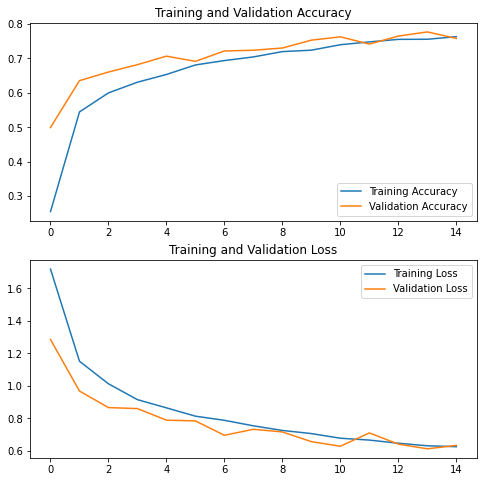

In [25]:
#visualising the accuracy and loss to the additional layers in the best model so far
acc = history5.history['accuracy']# importing accuracy from the fitted model
val_acc = history5.history['val_accuracy']# importing validation accuracy from the fitted model

loss = history5.history['loss']# importing loss from the fitted model
val_loss = history5.history['val_loss']# importing validation loss from the fitted model

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Batch Normalization**

Adding batch normalization from the keras after the spatial dropout.

In [9]:
from keras.layers import BatchNormalization # importing batch normalization from keras

In [27]:
# A CNN model with batch normalization in the best model so far
model6 = keras.Sequential()

model6.add(keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(150,150,3)))# addition of padding
model6.add(keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'))# addition of padding
model6.add(keras.layers.SpatialDropout2D(0.25))
model6.add(BatchNormalization())# introducing batch normalization in the network
model6.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))# adding strides

model6.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model6.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model6.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model6.add(keras.layers.SpatialDropout2D(0.25))
model6.add(BatchNormalization())# introducing batch normalization in the network
model6.add(keras.layers.MaxPooling2D((3,3),strides=(3,3)))# adding strides

model6.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding# addition of padding
model6.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model6.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model6.add(keras.layers.SpatialDropout2D(0.25))
model6.add(BatchNormalization())# introducing batch normalization in the network
model6.add(keras.layers.MaxPooling2D((3,3),strides=(3,3)))# adding strides

model6.add(keras.layers.Flatten())
model6.add(keras.layers.Dense(128, activation='relu'))
#removed the dropout and the dense layers
model6.add(keras.layers.Dense(6,activation='softmax'))


# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model6.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

**Summarising the model**

In [48]:
model6.summary()# summarizing the model

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 150, 150, 32)      18464     
_________________________________________________________________
spatial_dropout2d_6 (Spatial (None, 150, 150, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 75, 75, 32)       

**Model fitting**

In [28]:
history6 = model6.fit(train_dataset, epochs=15, validation_data=valid_dataset)#fitting the model and running with 15 epochs

Epoch 1/15
350/350 [==============================] - 17s 46ms/step - loss: 1.2489 - accuracy: 0.5252 - val_loss: 0.9754 - val_accuracy: 0.5971
Epoch 2/15
350/350 [==============================] - 15s 44ms/step - loss: 0.9042 - accuracy: 0.6454 - val_loss: 0.7650 - val_accuracy: 0.7068
Epoch 3/15
350/350 [==============================] - 16s 45ms/step - loss: 0.7933 - accuracy: 0.6910 - val_loss: 0.7416 - val_accuracy: 0.7176
Epoch 4/15
350/350 [==============================] - 15s 44ms/step - loss: 0.7319 - accuracy: 0.7192 - val_loss: 0.8227 - val_accuracy: 0.6832
Epoch 5/15
350/350 [==============================] - 16s 44ms/step - loss: 0.6718 - accuracy: 0.7464 - val_loss: 0.7422 - val_accuracy: 0.7279
Epoch 6/15
350/350 [==============================] - 16s 46ms/step - loss: 0.6307 - accuracy: 0.7676 - val_loss: 0.7080 - val_accuracy: 0.7322
Epoch 7/15
350/350 [==============================] - 16s 44ms/step - loss: 0.6002 - accuracy: 0.7742 - val_loss: 0.5659 - val_accuracy:

**Visualising**

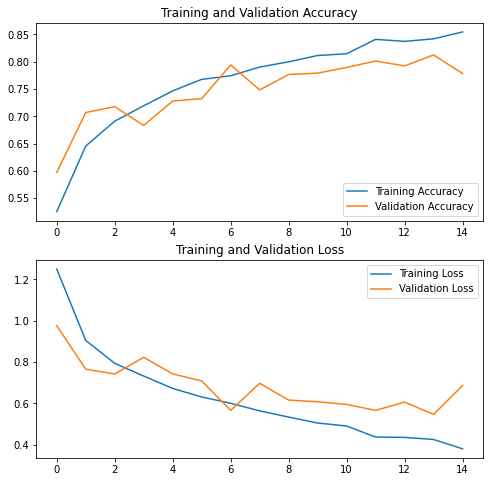

In [29]:
#visualisation of loss and accuracy in the batch normalization model
acc = history6.history['accuracy']# importing accuracy from the fitted model
val_acc = history6.history['val_accuracy']# importing validation accuracy from the fitted model

loss = history6.history['loss']# importing loss from the fitted model
val_loss = history6.history['val_loss']# importing validation loss from the fitted model

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Optimizers**

Trying different optimizers in the best model so far.

**Adagrad Optimizer**

In [30]:
# A CNN model with adagrad optimizer
# using adagrad optimizer in the best model so far
from tensorflow.keras.optimizers import Adagrad #importing adagrad optimizer

model7 = keras.Sequential()

model7.add(keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(150,150,3)))# addition of padding
model7.add(keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'))# addition of padding
model7.add(keras.layers.SpatialDropout2D(0.25))
model7.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))# adding strides

model7.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model7.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model7.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model7.add(keras.layers.SpatialDropout2D(0.25))
model7.add(keras.layers.MaxPooling2D((3,3),strides=(3,3)))# adding strides

model7.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model7.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model7.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model7.add(keras.layers.MaxPooling2D((3,3),strides=(3,3)))# adding strides
model7.add(keras.layers.Flatten())

model7.add(keras.layers.Dense(128, activation='relu'))
model7.add(keras.layers.Dense(6,activation='softmax'))
# Compile your model with your optimizer, loss, and metrics
opt = Adagrad(learning_rate = 0.001)  # set learning rate (same as default for now) # changing the optimizer to adagrad
model7.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

**Summarising the model**

In [49]:
model7.summary()# summarizing the model

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 150, 150, 32)      18464     
_________________________________________________________________
spatial_dropout2d_9 (Spatial (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 75, 75, 32)       

**Model fitting**

In [31]:
history7 = model7.fit(train_dataset, epochs=15, validation_data=valid_dataset)# fitting the model and running on 15 epochs

Epoch 1/15
350/350 [==============================] - 15s 41ms/step - loss: 1.5608 - accuracy: 0.3780 - val_loss: 1.1223 - val_accuracy: 0.5742
Epoch 2/15
350/350 [==============================] - 15s 42ms/step - loss: 1.1449 - accuracy: 0.5563 - val_loss: 1.0081 - val_accuracy: 0.6260
Epoch 3/15
350/350 [==============================] - 14s 40ms/step - loss: 1.0551 - accuracy: 0.5944 - val_loss: 0.9481 - val_accuracy: 0.6400
Epoch 4/15
350/350 [==============================] - 14s 41ms/step - loss: 1.0004 - accuracy: 0.6116 - val_loss: 0.9140 - val_accuracy: 0.6446
Epoch 5/15
350/350 [==============================] - 15s 42ms/step - loss: 0.9662 - accuracy: 0.6351 - val_loss: 0.8898 - val_accuracy: 0.6582
Epoch 6/15
350/350 [==============================] - 15s 42ms/step - loss: 0.9369 - accuracy: 0.6470 - val_loss: 0.8729 - val_accuracy: 0.6725
Epoch 7/15
350/350 [==============================] - 14s 40ms/step - loss: 0.9120 - accuracy: 0.6531 - val_loss: 0.8518 - val_accuracy:

**Visualising**

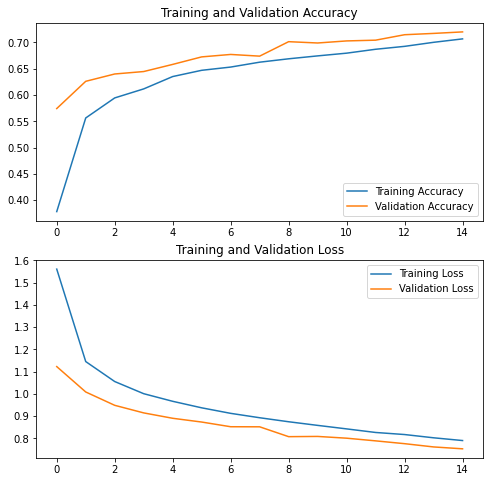

In [32]:
#visualisation of loss and accuracy in the adagrad optimizer model
acc = history7.history['accuracy']# importing accuracy from the fitted model
val_acc = history7.history['val_accuracy']# importing validation accuracy from the fitted model

loss = history7.history['loss']# importing loss from the fitted model
val_loss = history7.history['val_loss']# importing validation loss from the fitted model

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Adadelta Optimizer**

In [6]:
# A CNN model with Adadelta optimizer
# using adadelta opetimizer in the best model constructed until now
from tensorflow.keras.optimizers import Adadelta#importing adadelta optimizer from keras

model8 = keras.Sequential()

model8.add(keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(150,150,3)))# addition of padding
model8.add(keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'))# addition of padding
model8.add(keras.layers.SpatialDropout2D(0.25))
model8.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))# adding strides

model8.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model8.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model8.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model8.add(keras.layers.SpatialDropout2D(0.25))
model8.add(keras.layers.MaxPooling2D((3,3),strides=(3,3)))# adding strides

model8.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model8.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model8.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model8.add(keras.layers.MaxPooling2D((3,3),strides=(3,3)))# adding strides
model8.add(keras.layers.Flatten())

model8.add(keras.layers.Dense(128, activation='relu'))
model8.add(keras.layers.Dense(6,activation='softmax'))
# Compile your model with your optimizer, loss, and metrics
opt = Adadelta(learning_rate = 0.001)  # set learning rate (same as default for now) # adadelta optimizer
model8.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

**Summarising the model**

In [7]:
model8.summary()# summarizing the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      18464     
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        9

**Model fitting**

In [34]:
history8 = model8.fit(train_dataset, epochs=15, validation_data=valid_dataset)# fitting the model and running with 15 epochs

Epoch 1/15
350/350 [==============================] - 15s 41ms/step - loss: 3.3650 - accuracy: 0.1745 - val_loss: 2.0813 - val_accuracy: 0.1566
Epoch 2/15
350/350 [==============================] - 15s 42ms/step - loss: 2.3950 - accuracy: 0.1849 - val_loss: 1.9194 - val_accuracy: 0.1909
Epoch 3/15
350/350 [==============================] - 14s 41ms/step - loss: 2.1700 - accuracy: 0.1903 - val_loss: 1.8368 - val_accuracy: 0.2081
Epoch 4/15
350/350 [==============================] - 15s 43ms/step - loss: 2.0144 - accuracy: 0.2054 - val_loss: 1.7829 - val_accuracy: 0.2177
Epoch 5/15
350/350 [==============================] - 14s 40ms/step - loss: 1.9312 - accuracy: 0.2117 - val_loss: 1.7393 - val_accuracy: 0.2406
Epoch 6/15
350/350 [==============================] - 15s 41ms/step - loss: 1.8643 - accuracy: 0.2323 - val_loss: 1.7047 - val_accuracy: 0.2628
Epoch 7/15
350/350 [==============================] - 15s 41ms/step - loss: 1.8074 - accuracy: 0.2444 - val_loss: 1.6670 - val_accuracy:

**Visualising**

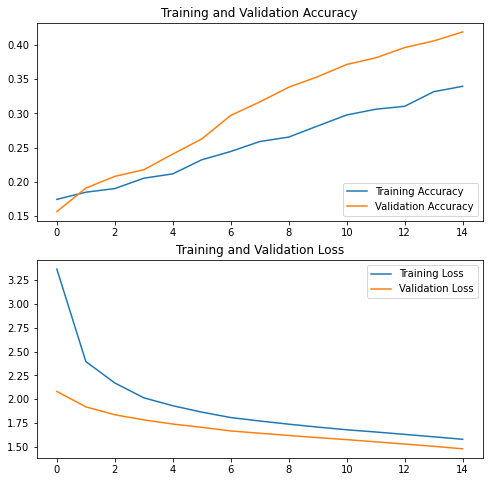

In [35]:
#visualisation of loss and accuracy in the adadelta optimizer model
acc = history8.history['accuracy']# importing accuracy from the fitted model
val_acc = history8.history['val_accuracy']# importing validation accuracy from the fitted model

loss = history8.history['loss']# importing loss from the fitted model
val_loss = history8.history['val_loss']# importing validation loss from the fitted model

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Adamax Optimizer**

In [36]:
# A CNN model with adamax optimizer
# using adamx optimizer in the best model until now
from tensorflow.keras.optimizers import Adamax #importing adamax optimizer from keras

model9 = keras.Sequential()

model9.add(keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(150,150,3)))# addition of padding
model9.add(keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'))# addition of padding
model9.add(keras.layers.SpatialDropout2D(0.25))
model9.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))# adding strides

model9.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model9.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model9.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model9.add(keras.layers.SpatialDropout2D(0.25))
model9.add(keras.layers.MaxPooling2D((3,3),strides=(3,3)))# adding strides

model9.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model9.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model9.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model9.add(keras.layers.MaxPooling2D((3,3),strides=(3,3)))# adding strides
model9.add(keras.layers.Flatten())

model9.add(keras.layers.Dense(128, activation='relu'))
model9.add(keras.layers.Dense(6,activation='softmax'))
# Compile your model with your optimizer, loss, and metrics
opt = Adamax(learning_rate = 0.001)  # set learning rate (same as default for now) # using adamax optimizer
model9.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

**Summarising the model**

In [51]:
model9.summary()# summarizing the model

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 150, 150, 32)      18464     
_________________________________________________________________
spatial_dropout2d_13 (Spatia (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 75, 75, 32)       

**Model fitting**

In [37]:
history9 = model9.fit(train_dataset, epochs=15, validation_data=valid_dataset)# fitting the model and running with 15 epochs

Epoch 1/15
350/350 [==============================] - 16s 43ms/step - loss: 1.4472 - accuracy: 0.4540 - val_loss: 1.0280 - val_accuracy: 0.6006
Epoch 2/15
350/350 [==============================] - 15s 42ms/step - loss: 0.9665 - accuracy: 0.6273 - val_loss: 0.8817 - val_accuracy: 0.6614
Epoch 3/15
350/350 [==============================] - 14s 41ms/step - loss: 0.8447 - accuracy: 0.6759 - val_loss: 0.7883 - val_accuracy: 0.7033
Epoch 4/15
350/350 [==============================] - 15s 43ms/step - loss: 0.7768 - accuracy: 0.7007 - val_loss: 0.7756 - val_accuracy: 0.7090
Epoch 5/15
350/350 [==============================] - 16s 44ms/step - loss: 0.7340 - accuracy: 0.7247 - val_loss: 0.7539 - val_accuracy: 0.7125
Epoch 6/15
350/350 [==============================] - 15s 42ms/step - loss: 0.6901 - accuracy: 0.7413 - val_loss: 0.6684 - val_accuracy: 0.7572
Epoch 7/15
350/350 [==============================] - 15s 42ms/step - loss: 0.6510 - accuracy: 0.7612 - val_loss: 0.6807 - val_accuracy:

**Visualising**

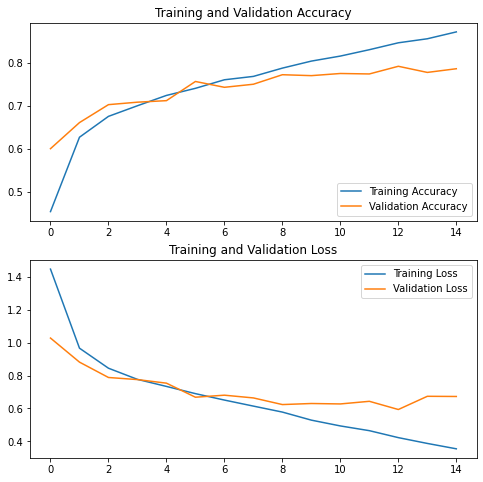

In [38]:
# visualisation of accuracy and loss in the adamax optimizer model
acc = history9.history['accuracy']# importing accuracy from the fitted model
val_acc = history9.history['val_accuracy']# importing validation accuracy from the fitted model

loss = history9.history['loss']# importing loss from the fitted model
val_loss = history9.history['val_loss']# importing validation loss from the fitted model

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**More BatchNormalization**

Since the previous BatchNormalization was not good so I tried adding Batchnormalization to most of the layers. 

In [39]:
# A CNN model with more batch normalization
model10 = keras.Sequential()

model10.add(keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(150,150,3)))# addition of padding
model10.add(keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'))# addition of padding
model10.add(BatchNormalization())#introducing batch normalization in the network
model10.add(keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'))# addition of padding
model10.add(keras.layers.SpatialDropout2D(0.10))# reduced the dropout rate
model10.add(BatchNormalization())#introducing batch normalization in the network
model10.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))# adding strides

model10.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model10.add(BatchNormalization())#introducing batch normalization in the network
model10.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model10.add(BatchNormalization())#introducing batch normalization in the network
model10.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model10.add(BatchNormalization())#introducing batch normalization in the network
model10.add(keras.layers.SpatialDropout2D(0.10))# reduced the dropout rate
model10.add(keras.layers.MaxPooling2D((3,3),strides=(3,3)))# adding strides

model10.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model10.add(BatchNormalization())#introducing batch normalization in the network
model10.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model10.add(BatchNormalization())#introducing batch normalization in the network
model10.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model10.add(BatchNormalization())#introducing batch normalization in the network
model10.add(keras.layers.Conv2D(32, (3,3),padding ='same', activation = 'relu'))# addition of padding
model10.add(BatchNormalization())#introducing batch normalization in the network
model10.add(keras.layers.SpatialDropout2D(0.10))# reduced the dropout rate
model10.add(keras.layers.MaxPooling2D((3,3),strides=(3,3)))# adding strides


model10.add(keras.layers.Flatten())
model10.add(keras.layers.Dense(128, activation='relu'))
model10.add(BatchNormalization())#introducing batch normalization in the network
model10.add(keras.layers.Dropout(0.10))# reduced the dropout rate
model10.add(keras.layers.Dense(6, activation='softmax'))
# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now) #using Adam optimizer
model10.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

**Summarising the model**

In [52]:
model10.summary()# summarizing the model

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 150, 150, 32)      18464     
_________________________________________________________________
batch_normalization_3 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 150, 150, 32)      9248      
_________________________________________________________________
spatial_dropout2d_15 (Spatia (None, 150, 150, 32)      0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 75, 75, 32)      

**Model fitting**

In [40]:
history10 = model10.fit(train_dataset, epochs=15, validation_data=valid_dataset)# fitting the model and running with 15 epochs

Epoch 1/15
350/350 [==============================] - 23s 62ms/step - loss: 1.1374 - accuracy: 0.5704 - val_loss: 0.8417 - val_accuracy: 0.6882
Epoch 2/15
350/350 [==============================] - 21s 60ms/step - loss: 0.7764 - accuracy: 0.7077 - val_loss: 1.3516 - val_accuracy: 0.5220
Epoch 3/15
350/350 [==============================] - 21s 59ms/step - loss: 0.6758 - accuracy: 0.7473 - val_loss: 0.5959 - val_accuracy: 0.7826
Epoch 4/15
350/350 [==============================] - 22s 62ms/step - loss: 0.6059 - accuracy: 0.7742 - val_loss: 0.7783 - val_accuracy: 0.7340
Epoch 5/15
350/350 [==============================] - 22s 63ms/step - loss: 0.5368 - accuracy: 0.8003 - val_loss: 0.5854 - val_accuracy: 0.7951
Epoch 6/15
350/350 [==============================] - 21s 58ms/step - loss: 0.5040 - accuracy: 0.8137 - val_loss: 0.6366 - val_accuracy: 0.7812
Epoch 7/15
350/350 [==============================] - 20s 58ms/step - loss: 0.4729 - accuracy: 0.8284 - val_loss: 0.5118 - val_accuracy:

**Visualising**

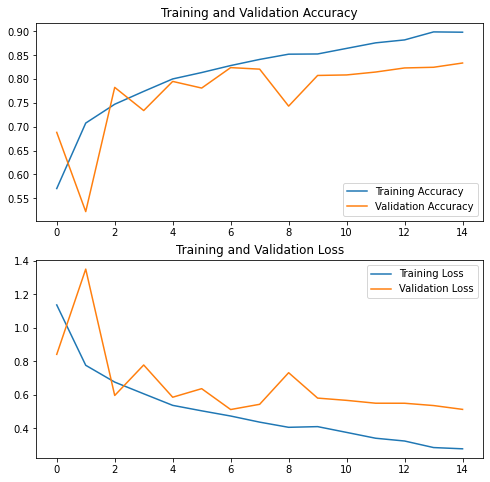

In [41]:
#visualisation of loss and accuracy in the extra batch normalization model
acc = history10.history['accuracy']# importing accuracy from the fitted model
val_acc = history10.history['val_accuracy']# importing validation accuracy from the fitted model

loss = history10.history['loss']# importing loss from the fitted model
val_loss = history10.history['val_loss']# importing validation loss from the fitted model

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Best model**

Adding extra dense layers and batcch normalization made the model work better than the other models

In [10]:
# A CNN model with extra dense layers and most of the layers have batch normalization

model11 = keras.Sequential()

model11.add(keras.layers.Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(150,150,3)))# addition of padding
model11.add(keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'))# addition of padding
model11.add(BatchNormalization())# introducing batch normalization in the network
model11.add(keras.layers.SpatialDropout2D(0.25))
model11.add(BatchNormalization())# introducing batch normalization in the network
model11.add(keras.layers.MaxPooling2D((2,2), strides=(2,2)))# adding strides

model11.add(keras.layers.Conv2D(64, (3,3),padding ='same', activation = 'relu'))# addition of padding
model11.add(BatchNormalization())# introducing batch normalization in the network
model11.add(keras.layers.Conv2D(64, (3,3),padding ='same', activation = 'relu'))# addition of padding
model11.add(BatchNormalization())# introducing batch normalization in the network
model11.add(keras.layers.Conv2D(64, (3,3),padding ='same', activation = 'relu'))# addition of padding
model11.add(BatchNormalization())# introducing batch normalization in the network
model11.add(keras.layers.SpatialDropout2D(0.25))
model11.add(BatchNormalization())# introducing batch normalization in the network
model11.add(keras.layers.MaxPooling2D((3,3),strides=(3,3)))# adding strides

model11.add(keras.layers.Conv2D(64, (3,3),padding ='same', activation = 'relu'))# addition of padding
model11.add(BatchNormalization())# introducing batch normalization in the network
model11.add(keras.layers.Conv2D(64, (3,3),padding ='same', activation = 'relu'))# addition of padding
model11.add(BatchNormalization())# introducing batch normalization in the network
model11.add(keras.layers.Conv2D(64, (3,3),padding ='same', activation = 'relu'))# addition of padding
model11.add(BatchNormalization())# introducing batch normalization in the network
model11.add(keras.layers.SpatialDropout2D(0.25))
model11.add(BatchNormalization())# introducing batch normalization in the network
model11.add(keras.layers.MaxPooling2D((3,3),strides=(3,3)))# adding strides

model11.add(keras.layers.Flatten())
model11.add(keras.layers.Dense(512, activation='relu'))
model11.add(BatchNormalization())# introducing batch normalization in the network
model11.add(Dropout(0.25))
model11.add(keras.layers.Dense(128, activation='relu'))
model11.add(BatchNormalization())# introducing batch normalization in the network
model11.add(Dropout(0.25))
model11.add(keras.layers.Dense(64, activation='relu'))
model11.add(Dropout(0.25))
model11.add(keras.layers.Dense(6, activation='softmax'))


# Compile your model with your optimizer, loss, and metrics
opt = Adam(learning_rate = 0.001)  # set learning rate (same as default for now)
model11.compile(optimizer=opt, loss='categorical_crossentropy', 
              metrics=['accuracy'])

**Summarising the model**

In [11]:
model11.summary()# summarizing the model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 150, 150, 32)      18464     
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 150, 150, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 64)       

**Model fitting**

In [12]:
history11 = model11.fit(train_dataset, epochs=15, validation_data=valid_dataset)# fitting the model and running with 15 epochs

Epoch 1/15


2022-11-14 00:53:31.390577: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


350/350 [==============================] - 38s 84ms/step - loss: 1.2881 - accuracy: 0.5120 - val_loss: 1.2814 - val_accuracy: 0.5281
Epoch 2/15
350/350 [==============================] - 22s 63ms/step - loss: 0.9135 - accuracy: 0.6515 - val_loss: 1.2195 - val_accuracy: 0.5506
Epoch 3/15
350/350 [==============================] - 23s 65ms/step - loss: 0.7747 - accuracy: 0.7198 - val_loss: 0.5940 - val_accuracy: 0.7833
Epoch 4/15
350/350 [==============================] - 22s 63ms/step - loss: 0.6944 - accuracy: 0.7508 - val_loss: 0.8831 - val_accuracy: 0.6668
Epoch 5/15
350/350 [==============================] - 22s 64ms/step - loss: 0.6393 - accuracy: 0.7736 - val_loss: 0.5938 - val_accuracy: 0.7876
Epoch 6/15
350/350 [==============================] - 22s 63ms/step - loss: 0.5977 - accuracy: 0.7855 - val_loss: 0.6375 - val_accuracy: 0.7765
Epoch 7/15
350/350 [==============================] - 22s 63ms/step - loss: 0.5572 - accuracy: 0.8015 - val_loss: 0.5514 - val_accuracy: 0.8062
Epo

**Visualising**

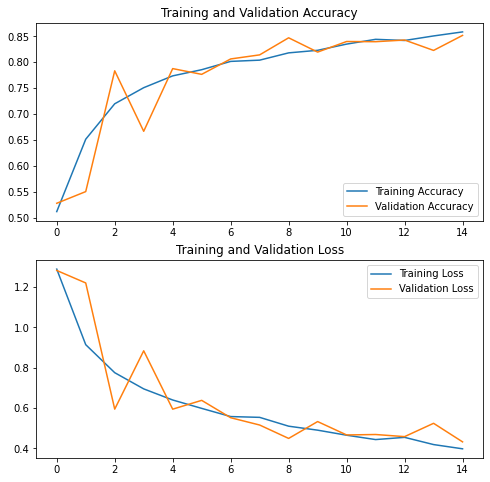

In [15]:
#visualisation of loss and accuracy in the extra batch normalization model
acc = history11.history['accuracy']# importing accuracy from the fitted model
val_acc = history11.history['val_accuracy']# importing validation accuracy from the fitted model

loss = history11.history['loss']# importing loss from the fitted model
val_loss = history11.history['val_loss']# importing validation loss from the fitted model

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Examine the results for some validation examples.

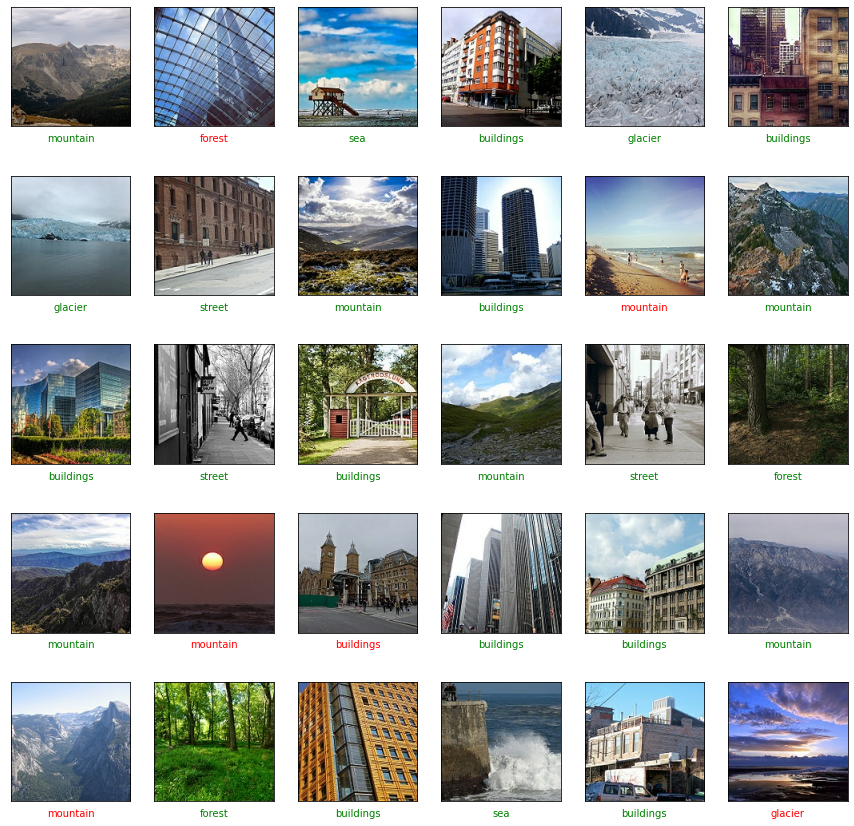

In [66]:
#Visualize 30 of the predicted data with green label for correct predictions
#and red label vice versa.
plt.figure(figsize=(15,15))
for images, labels in valid_dataset.take(1):
    for i in range(30):
        prediction = model11.predict(images[i].numpy().reshape(1,150,150,3))#change the name of the model accordingly
        plt.subplot(5, 6, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.grid(False)
        xlabel = plt.xlabel(class_names[prediction.argmax()])
        if (prediction.argmax() == labels[i].numpy().argmax()):
            xlabel.set_color("green")
        else:
            xlabel.set_color("red")
plt.show()

### Make Predictions for Test_Pred data.  
#### Note: Results are stored in a dictionary, which is keyed by file numbers (as integers).

In [68]:
# Load the test_pred data (which has no target labels)
import os
import cv2
import pandas as pd
import csv
pred_directory = '../input/csc-578-hw7-fall-2022/test_pred'
result_dict = {} # dictionary to store predictions (keyed by file number)

# iterate over files in that directory
for filename in os.listdir(pred_directory):
    f = os.path.join(pred_directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        fnum = int(filename[:-4]) # filename e.g. '103.jpg" -> 103
        img = cv2.imread(f)
        #img = img/255.0
        img = img.reshape(-1,150,150,3)
        pred = model11.predict(img)#change the name of the model
        result_dict[fnum] = pred[0]  # [0] because there is only one data
print (len(result_dict))

2993


**Creating a csv file**

In [71]:
data=pd.DataFrame.from_dict(result_dict,orient='index',columns=['buildings','forest','glacier','mountain','sea','street'])# converting the data into dataframe and adding the column names
data.reset_index(inplace=True)#resetting the index
data=data.rename(columns={'index':'fnum'})#the first index of the csv file which is a value used for sorting
data.sort_values(by=['fnum'])#sorting the values by fnum
data.to_csv('submission.csv',index=False)#to neglect the serial number the index is given false

## (!!) Write the rest of the code by yourself.
### You must write the submission file, where the entries are sorted by the file number.